In [1]:
from read_ggp_run import *

In [2]:
params_config = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'bound'} 

params_config2 = {'mean_lambda': 'bound',
                    'gamma_lambda': 'bound',
                    'var_lambda': 'bound',
                    'mean_q': 'bound',
                    'gamma_q': 'bound',
                    'var_q':'bound',
                    'beta':'bound',
                    'var_x':'bound',
                    'var_g':'bound',
                    'var_dx':'bound',
                    'var_dg':'fixed'} 

In [33]:
def plot_true_vs_estim(directory, sample, parameter, param_range, params_config, log=True, skip=0):
    fig, ax = plt.subplots(figsize=(13,6))
    ax.plot(np.linspace(param_range[0], param_range[-1], 100), np.linspace(param_range[0], param_range[-1], 100), ls='--')

    for i, param in enumerate(param_range):
        i+=skip
        directory_i = directory.format(i)

        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default

        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)

        parameters_settings = read_params_config(minimization_final_file)
        final = get_params_config(parameters_settings, parameter)["final"].values[0]
        ax.scatter(param, final, label= parameter+" = "+str(param), color='tab:blue')
    ax.set_ylabel("estim. "+parameter)
    ax.set_xlabel("'true' "+parameter)
    if log == 'x':
        plt.xscale('log')
    if log == True:
        plt.xscale('log')
        plt.yscale('log')

    ax.set_xticks(param_range)
    ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])

    # plt.legend(loc=(1.05,0))
    plt.show()


def plot_all_params(directory, sample, parameter, param_range, params_config, skip=0, logx=False):
    fig, ax = plt.subplots(figsize=(10,6))
    cmap = plt.cm.tab10

    if len(np.unique(param_range))==1:
        replicates = True
    else:
        replicates = False
    for i, param in enumerate(param_range):
        i+=skip

        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)
        for j,k in enumerate(params_config.keys()):
            if k != parameter:
                parameters_settings = read_params_config(minimization_final_file)
                final = get_params_config(parameters_settings, k)["final"].values[0]
                init = get_params_config(parameters_settings, k)["init"].values[0]
        
                if replicates:
                    if i==skip:
                        plt.scatter(i, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(i, init/final, color=cmap(j))
                else:
                    if i==skip:
                        plt.scatter(param, init/final, color=cmap(j), label=k)
                    else: 
                        plt.scatter(param, init/final, color=cmap(j))
    if logx:    
       plt.xscale('log')

    if replicates:
        ax.set_xticks([i/2])
        ax.set_xticklabels([str(param)])
    else:
        ax.set_xticks(param_range)
        ax.set_xticklabels([ str(v) for i,v in enumerate(param_range)])
        ax.set_ylabel("true/estim.")
    ax.set_xlabel(parameter)
    ax.axhline(1, ls='--', color='tab:blue')

    plt.legend(loc=(1.05,0))
    plt.show()



def plot_param_against_second(directory, sample, x_param, x_param_range, y_param, true_y, params_config, skip=0):
    fig, ax = plt.subplots(figsize=(13,6))
    ax.plot([x_param_range[0], x_param_range[-1]], [true_y,true_y], ls='--')

    for i, x in enumerate(x_param_range):
        i+=skip

        directory_i = directory.format(i)
        sample_i = sample.format(i)

        filebase = default_filebase(directory_i, sample_i) # default
        minimization_iter_file, minimization_final_file = get_minimization_file(filebase, params_config)

        parameters_settings = read_params_config(minimization_final_file)
        final = get_params_config(parameters_settings, y_param)["final"].values[0]
        ax.scatter(x, final, label=x_param+ ' = ' +str(x), color='tab:blue')

    ax.set_ylabel("estim. "+y_param)
    ax.set_xlabel(x_param)

    plt.xscale('log')
    ax.set_xticks(x_param_range)
    ax.set_xticklabels([ str(v) for i,v in enumerate(x_param_range)])
    # plt.legend(loc=(1.05,0))
    plt.show()


## Update
- hessian matrix is stable
- new simulation
- most parameters are estimeted well acros several orders of magnitude, apart from beta and especially var_dg

## Next
- fix issue with var_dg
- check if how 'bad' beta actually is and how the error bar relates to that
- make reading of data more robust (who should I ask)
- check prediction / look for trends within cell cycles etc.

## Estimation of var_dg (asymmetric split of gfp)

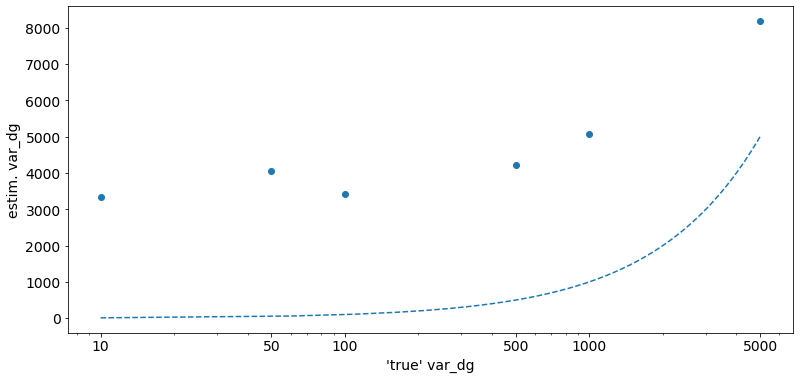

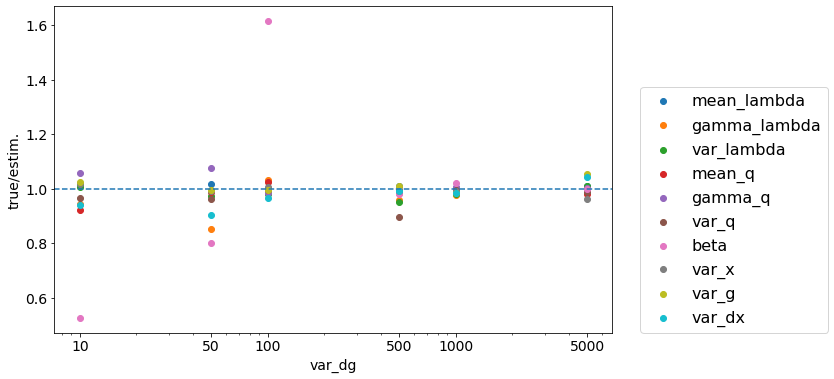

In [31]:
plot_true_vs_estim('../data/var_dg/var_dg_{:d}', 'var_dg_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], params_config, log='x')
plot_all_params('../data/var_dg/var_dg_{:d}', 'var_dg_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], params_config, logx=True)

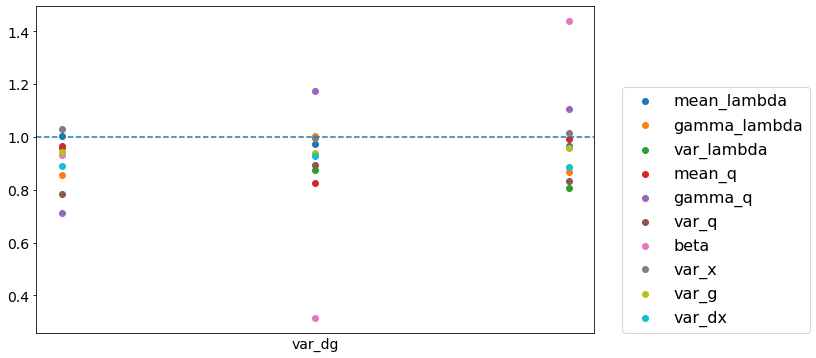

In [34]:

plot_all_params('../data/fixed_var_dg_large_cells/fixed_var_dg_large_cells_{:d}', 'fixed_var_dg_large_cells_{:d}', "var_dg", [0, 0, 0], params_config2, skip=3)

## Vary var_dx

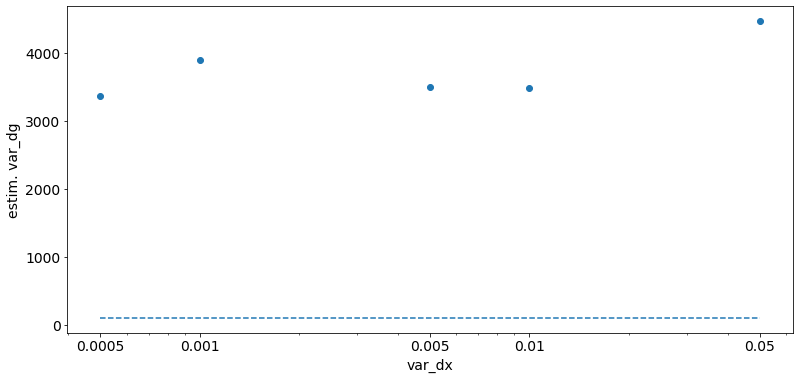

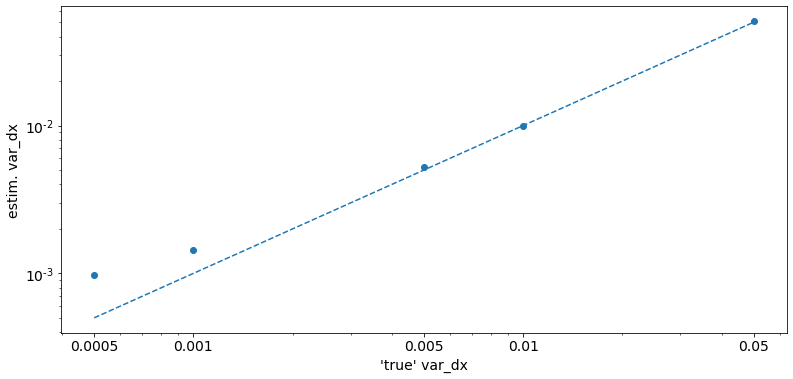

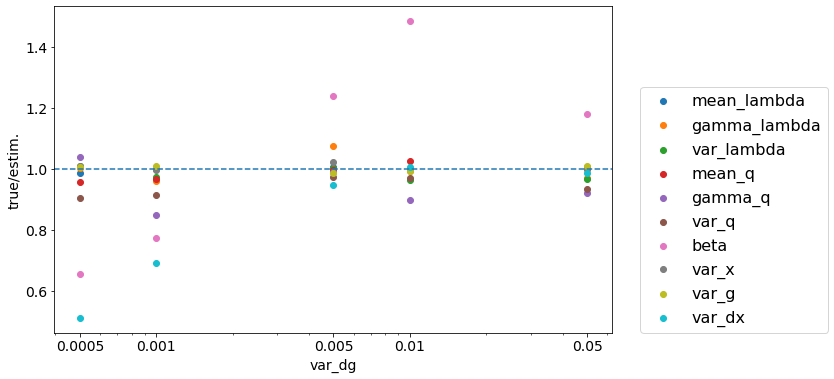

In [37]:
plot_param_against_second('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dx", 
                            [0.0005, 0.001, 0.005 , 0.01, 0.05], "var_dg", 100, params_config)
plot_true_vs_estim('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dx", [0.0005, 0.001, 0.005 , 0.01, 0.05],params_config)

plot_all_params('../data/var_dx/var_dx_{:d}', 'var_dx_{:d}', "var_dg", [0.0005, 0.001, 0.005 , 0.01, 0.05], params_config, logx=True)

## Vary var_g

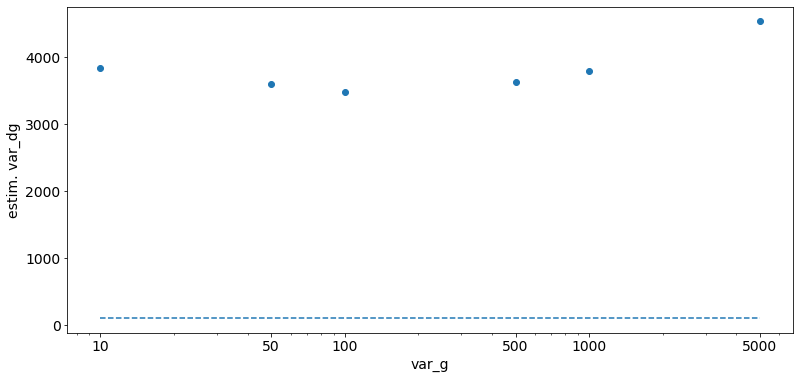

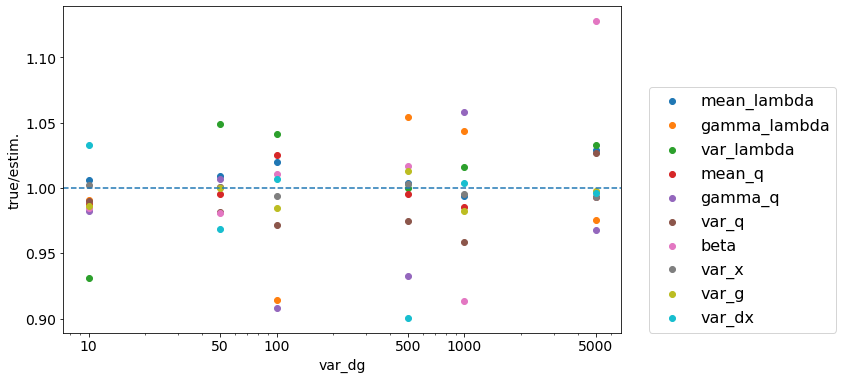

In [39]:

plot_param_against_second('../data/var_g/var_g_{:d}', 'var_g_{:d}', "var_g", 
                            [10, 50, 100, 500, 1000, 5000], "var_dg", 100, params_config)
plot_all_params('../data/var_g/var_g_{:d}', 'var_g_{:d}', "var_dg",[10, 50, 100, 500, 1000, 5000], params_config, logx=True)


## Vary dt

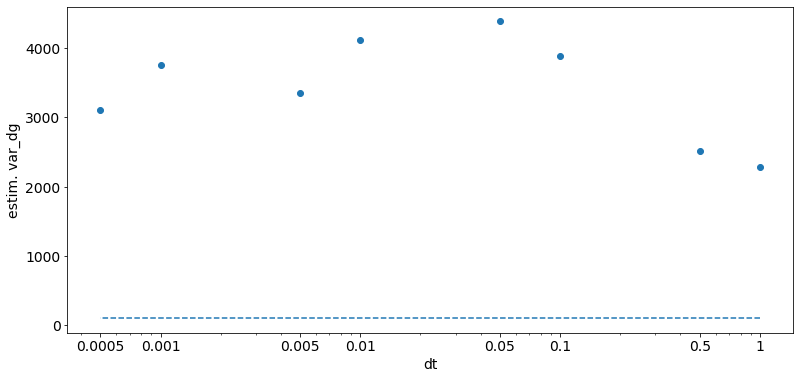

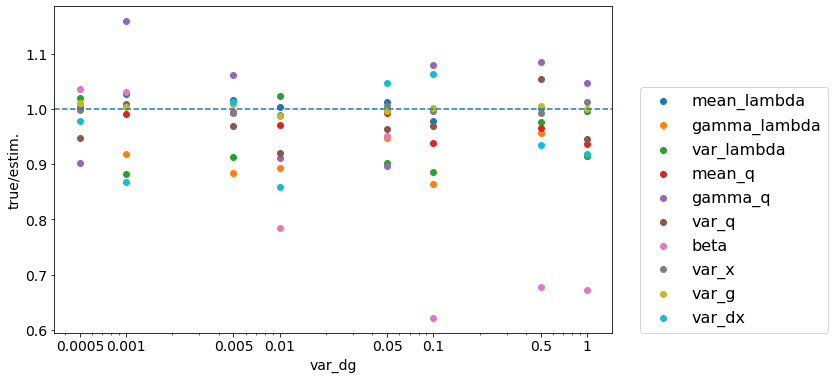

In [40]:
plot_param_against_second('../data/dt/dt_{:d}', 'dt_{:d}', "dt", 
                            [1, 0.5, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], "var_dg", 100, params_config)
plot_all_params('../data/dt/dt_{:d}', 'dt_{:d}', "var_dg", [1, 0.5, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4], params_config, logx=True)


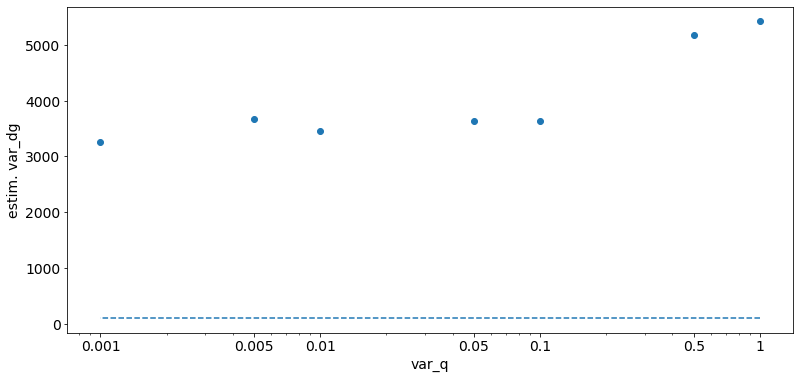

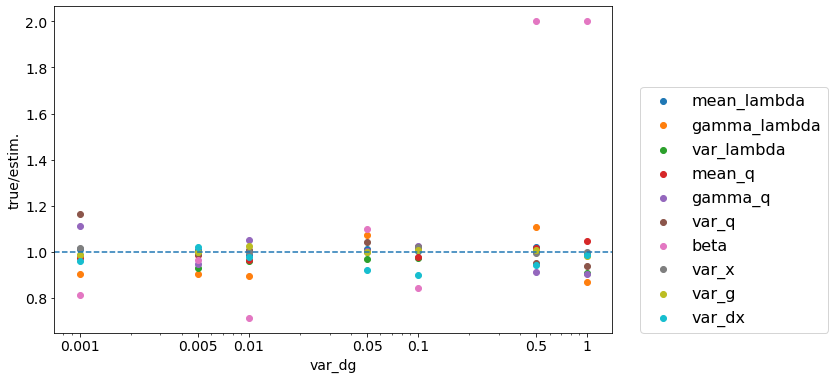

In [41]:

plot_param_against_second('../data/var_q/var_q_{:d}', 'var_q_{:d}', "var_q", 
                            [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3], "var_dg", 100, params_config)
plot_all_params('../data/var_q/var_q_{:d}', 'var_q_{:d}', "var_dg", [1, 5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3], params_config, logx=True)


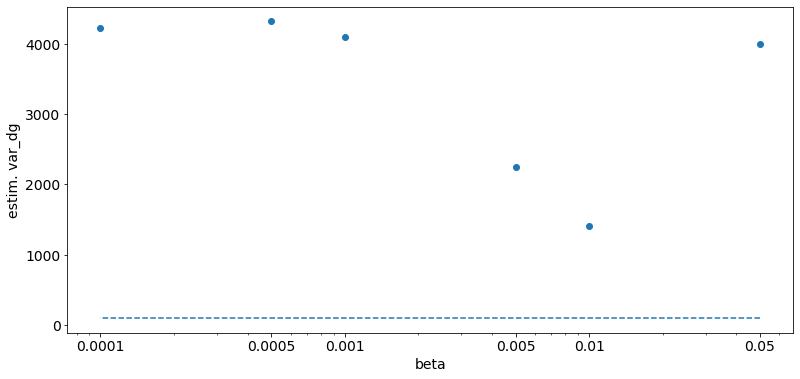

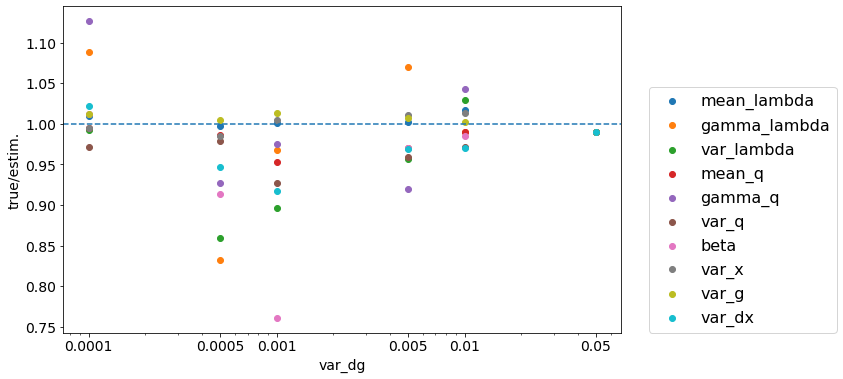

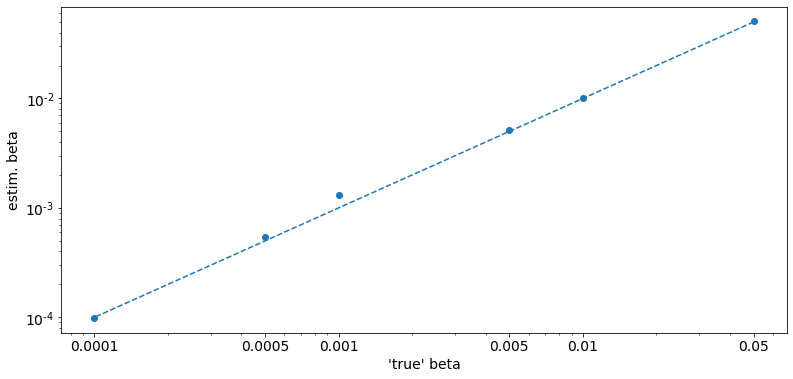

In [45]:
plot_param_against_second('../data/beta/beta_{:d}', 'beta_{:d}', "beta", 
                            [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], "var_dg", 100, params_config)
plot_all_params('../data/beta/beta_{:d}', 'beta_{:d}', "var_dg", [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], params_config, logx=True)
plot_true_vs_estim('../data/beta/beta_{:d}', 'beta_{:d}', "beta", [5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4], params_config,log=True)


## Timer cells

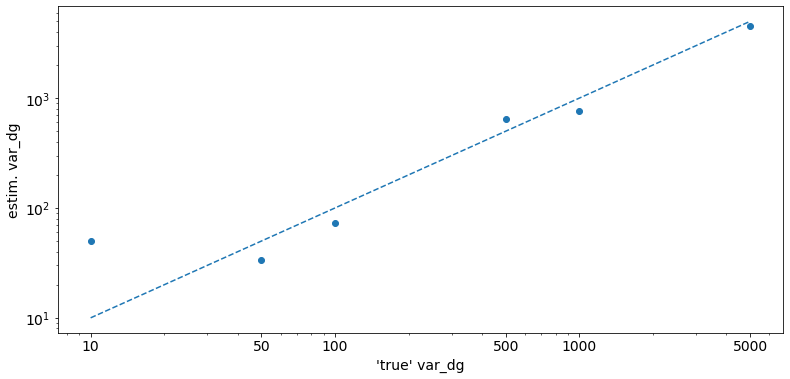

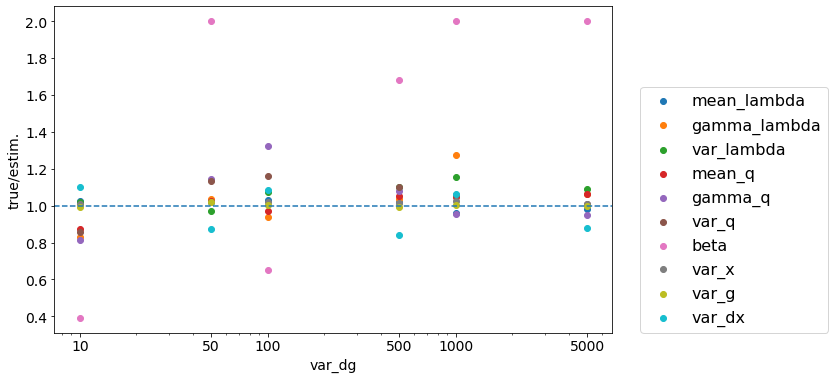

In [50]:
plot_true_vs_estim('../data/var_dg_timer/var_dg_timer_{:d}', 'var_dg_timer_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], params_config, log=True)
plot_all_params('../data/var_dg_timer/var_dg_timer_{:d}', 'var_dg_timer_{:d}', "var_dg", [10, 50, 100, 500, 1000, 5000], params_config, logx=True)

#  '../data/var_dg_timer/var_dg_timer_3/'